In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import mplcursors
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [120]:
#Fonts 
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='../public/media/fonts/kr/NanumGothic-Regular.ttf')

In [2]:
kr_dfc = pd.read_csv('./KR_Corp_Waste.csv', encoding='cp949')

In [3]:
kr_dfc.head()

,기초시군구(관할관청),업체명,연락처,폐기물구분,폐기물명,연간배출량(톤)
0,강원특별자치도 강릉시,(주)기성환경,033-655-6969,사업장배출시설계폐기물,그 밖의 폐목재류,250.83
1,강원특별자치도 강릉시,(주)기성환경,033-655-6969,사업장배출시설계폐기물,폐합성수지류(폐염화비닐수지류는 제외한다),219.17
2,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 공정오니(무기성),0.00
3,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 유기성오니,0.00
4,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 폐기물,0.00


In [4]:
print(kr_dfc.head())  
print(kr_dfc.info())  

   기초시군구(관할관청)                 업체명           연락처        폐기물구분  \
0  강원특별자치도 강릉시             (주)기성환경  033-655-6969  사업장배출시설계폐기물   
1  강원특별자치도 강릉시             (주)기성환경  033-655-6969  사업장배출시설계폐기물   
2  강원특별자치도 강릉시  (주)에코비트워터(강릉하수처리장)  033-650-5200  사업장배출시설계폐기물   
3  강원특별자치도 강릉시  (주)에코비트워터(강릉하수처리장)  033-650-5200  사업장배출시설계폐기물   
4  강원특별자치도 강릉시  (주)에코비트워터(강릉하수처리장)  033-650-5200  사업장배출시설계폐기물   

                     폐기물명  연간배출량(톤)  
0               그 밖의 폐목재류    250.83  
1  폐합성수지류(폐염화비닐수지류는 제외한다)    219.17  
2          그 밖의 공정오니(무기성)      0.00  
3              그 밖의 유기성오니      0.00  
4                그 밖의 폐기물      0.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기초시군구(관할관청)  16330 non-null  object 
 1   업체명          16330 non-null  object 
 2   연락처          15850 non-null  object 
 3   폐기물구분        9691 non-null   object 
 4   폐기물명         163

In [5]:
df_cluster = kr_dfc[['기초시군구(관할관청)', '연간배출량(톤)']].copy()

In [6]:
# Encode city names into numbers
label_encoder = LabelEncoder()
df_cluster['기초시군구(관할관청)'] = label_encoder.fit_transform(df_cluster['기초시군구(관할관청)'])

print(df_cluster.head())  # Verify encoding

   기초시군구(관할관청)  연간배출량(톤)
0            0    250.83
1            0    219.17
2            0      0.00
3            0      0.00
4            0      0.00


In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)  # Normalize values

In [8]:
# Number of clusters (3 to 5~)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_cluster.head())  # Check assigned clusters

   기초시군구(관할관청)  연간배출량(톤)  Cluster
0            0    250.83        1
1            0    219.17        1
2            0      0.00        1
3            0      0.00        1
4            0      0.00        1


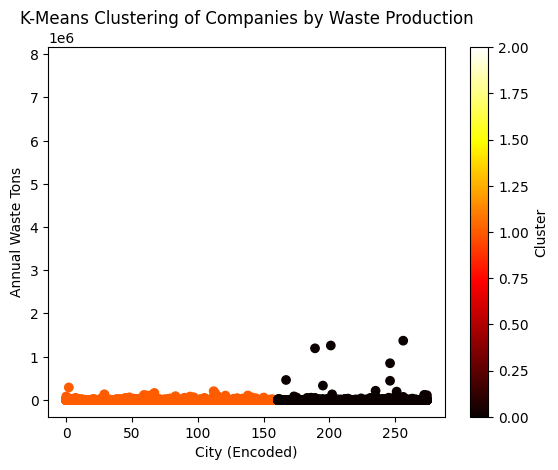

In [9]:
plt.scatter(df_cluster['기초시군구(관할관청)'], df_cluster['연간배출량(톤)'], c=df_cluster['Cluster'], cmap='hot')
plt.xlabel('City (Encoded)')
plt.ylabel('Annual Waste Tons')
plt.title('K-Means Clustering of Companies by Waste Production')
plt.colorbar(label="Cluster")
plt.show()

In [10]:
kr_dfc.isnull().sum()

기초시군구(관할관청)       0
업체명               0
연락처             480
폐기물구분          6639
폐기물명              0
연간배출량(톤)          0
dtype: int64

In [11]:
df_cleaned = kr_dfc.dropna().copy()
df_cleaned_cols = kr_dfc.dropna(axis=1).copy()

In [44]:
df_cleaned.isnull().sum()

기초시군구(관할관청)    0
업체명            0
연락처            0
폐기물구분          0
폐기물명           0
연간배출량(톤)       0
dtype: int64

In [30]:
company_max_values = (
    df_cleaned.groupby("업체명")["연간배출량(톤)"]
    .max()
    .reset_index()
    .sort_values(by="연간배출량(톤)", ascending=True)  # Sort from min to max
)

for index, row in company_max_values.iterrows():
    print(f"Company: {row['업체명']}, Max Emission: {row['연간배출량(톤)']:.2f} tons")


Company: 환상자원, Max Emission: 0.00 tons
Company: 의료법인영문의료재단 다보스병원, Max Emission: 0.00 tons
Company: (주)하나플랜트, Max Emission: 0.00 tons
Company: (주)포스코오엔엠, Max Emission: 0.00 tons
Company: (주)에코비트워터(강릉하수처리장), Max Emission: 0.00 tons
Company: 포항죽도시장상가번영회, Max Emission: 0.00 tons
Company: 포천~화도 고속도로 민간투자사업 2공구, Max Emission: 0.00 tons
Company: 대산에코(주), Max Emission: 0.00 tons
Company: 동양에너텍(주), Max Emission: 0.00 tons
Company: sk이노베이션(주) 울산CLX, Max Emission: 0.14 tons
Company: 일흥합성공업(주) 본사, Max Emission: 0.48 tons
Company: (주)대아지엘피, Max Emission: 0.69 tons
Company: 한국도자기(주) 슈퍼2부, Max Emission: 0.69 tons
Company: 한영중학교, Max Emission: 0.84 tons
Company: 위더스제약(주), Max Emission: 0.85 tons
Company: 대경씨푸드, Max Emission: 1.25 tons
Company: 한영고등학교, Max Emission: 1.26 tons
Company: 현대자동차(주)고양하이테크센터, Max Emission: 1.26 tons
Company: 해인기업(주) 여천공장, Max Emission: 1.28 tons
Company: (유)옥천환경, Max Emission: 1.36 tons
Company: 한영외국어고등학교, Max Emission: 1.40 tons
Company: 한국도자기(주)인쇄1부, Max Emission: 1.42 tons

In [35]:
#define the company name and filter 
company_name = "도봉구청(청소행정과)-일반(제2012-002호)"

company_result = company_max_values.loc[company_max_values["업체명"] == company_name]

if not company_result.empty:
    print(f"Company: {company_result.iloc[0]['업체명']}, Max Emission: {company_result.iloc[0]['연간배출량(톤)']:.2f} tons")
else:
    print(f"Company '{company_name}' not found in the dataset")

Company: 도봉구청(청소행정과)-일반(제2012-002호), Max Emission: 7774960.00 tons


In [16]:
print(df_cleaned.head(4))  
#print(df_cleaned.info()) 

   기초시군구(관할관청)                 업체명           연락처        폐기물구분  \
0  강원특별자치도 강릉시             (주)기성환경  033-655-6969  사업장배출시설계폐기물   
1  강원특별자치도 강릉시             (주)기성환경  033-655-6969  사업장배출시설계폐기물   
2  강원특별자치도 강릉시  (주)에코비트워터(강릉하수처리장)  033-650-5200  사업장배출시설계폐기물   
3  강원특별자치도 강릉시  (주)에코비트워터(강릉하수처리장)  033-650-5200  사업장배출시설계폐기물   

                     폐기물명  연간배출량(톤)  
0               그 밖의 폐목재류    250.83  
1  폐합성수지류(폐염화비닐수지류는 제외한다)    219.17  
2          그 밖의 공정오니(무기성)      0.00  
3              그 밖의 유기성오니      0.00  


In [36]:
#df_cluster2 = df_cleaned[['기초시군구(관할관청)', '연간배출량(톤)']].copy()
df_cluster2 = df_cleaned[['업체명', '연간배출량(톤)']].copy()

In [38]:
# Encode city names into numbers
#label_encoder = LabelEncoder()
#df_cluster2['기초시군구(관할관청)'] = label_encoder.fit_transform(df_cluster2['기초시군구(관할관청)'])

#print(df_cluster2.head())  # Verify encoding
label_encoder = LabelEncoder()
df_cluster2['업체명'] = label_encoder.fit_transform(df_cluster2['업체명'])
print(df_cluster2.head(6))

   업체명  연간배출량(톤)
0  161    250.83
1  161    219.17
2  701      0.00
3  701      0.00
4  701      0.00
5  701      0.00


In [39]:
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df_cluster2)  # Normalize values

In [57]:
# Number of clusters (3 to 5~)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster2['Cluster'] = kmeans.fit_predict(df_scaled2)

print(df_cluster2.head())  # Check assigned clusters

   업체명  연간배출량(톤)  Cluster
0  161    250.83        1
1  161    219.17        1
2  701      0.00        1
3  701      0.00        1
4  701      0.00        1


In [58]:
unique_clusters = df_cluster2['Cluster'].unique()
print(f"Unique Clusters: {unique_clusters}")

Unique Clusters: [1 4 0 3 2 5]


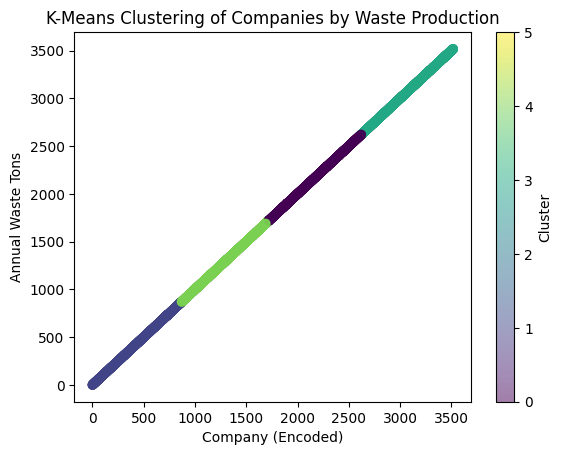

In [63]:
plt.scatter(df_cluster2['업체명'], df_cluster2['업체명'], c=df_cluster2['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Company (Encoded)')
plt.ylabel('Annual Waste Tons')
plt.title('K-Means Clustering of Companies by Waste Production')
plt.colorbar(label="Cluster")
plt.show()

In [64]:
df_clusterC = df_cleaned[['기초시군구(관할관청)', '연간배출량(톤)']].copy()

In [67]:
label_encoder = LabelEncoder()
df_clusterC['기초시군구(관할관청)'] = label_encoder.fit_transform(df_clusterC['기초시군구(관할관청)'])
print(df_clusterC.head(6))

   기초시군구(관할관청)  연간배출량(톤)
0            0    250.83
1            0    219.17
2            0      0.00
3            0      0.00
4            0      0.00
5            0      0.00


In [68]:
scaler = StandardScaler()
df_scaledC = scaler.fit_transform(df_clusterC)  # Normalize values

In [69]:
# Number of clusters (3 to 5~)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clusterC['Cluster'] = kmeans.fit_predict(df_scaledC)

print(df_clusterC.head())

   기초시군구(관할관청)  연간배출량(톤)  Cluster
0            0    250.83        0
1            0    219.17        0
2            0      0.00        0
3            0      0.00        0
4            0      0.00        0


In [70]:
unique_clustersC = df_clusterC['Cluster'].unique()
print(f"Unique Clusters: {unique_clustersC}")

Unique Clusters: [0 5 3 2 4 1]


In [73]:
for cluster in sorted(df_clusterC["Cluster"].unique()):  # Iterate through sorted unique clusters
    print(f"\n🔹 Cluster {cluster} - Max Waste per City:")
    
    cluster_data = max_values_by_city[max_values_by_city["Cluster"] == cluster]
    
    for _, row in cluster_data.iterrows():
        print(f"City (Encoded): {row['기초시군구(관할관청)']}, Max Emission: {row['연간배출량(톤)']:.2f} tons")



🔹 Cluster 0 - Max Waste per City:
City (Encoded): 0.0, Max Emission: 80762.33 tons
City (Encoded): 1.0, Max Emission: 96.00 tons
City (Encoded): 2.0, Max Emission: 289029.35 tons
City (Encoded): 3.0, Max Emission: 30099.29 tons
City (Encoded): 4.0, Max Emission: 4413.33 tons
City (Encoded): 5.0, Max Emission: 1851.05 tons
City (Encoded): 6.0, Max Emission: 1074.52 tons
City (Encoded): 7.0, Max Emission: 49523.87 tons
City (Encoded): 8.0, Max Emission: 34119.40 tons
City (Encoded): 9.0, Max Emission: 2502.53 tons
City (Encoded): 10.0, Max Emission: 21703.48 tons
City (Encoded): 11.0, Max Emission: 190.24 tons
City (Encoded): 12.0, Max Emission: 585.25 tons
City (Encoded): 13.0, Max Emission: 2457.54 tons
City (Encoded): 14.0, Max Emission: 1539.85 tons
City (Encoded): 15.0, Max Emission: 3772.15 tons
City (Encoded): 16.0, Max Emission: 1039.57 tons
City (Encoded): 17.0, Max Emission: 1213.92 tons
City (Encoded): 18.0, Max Emission: 2664.15 tons
City (Encoded): 19.0, Max Emission: 15996

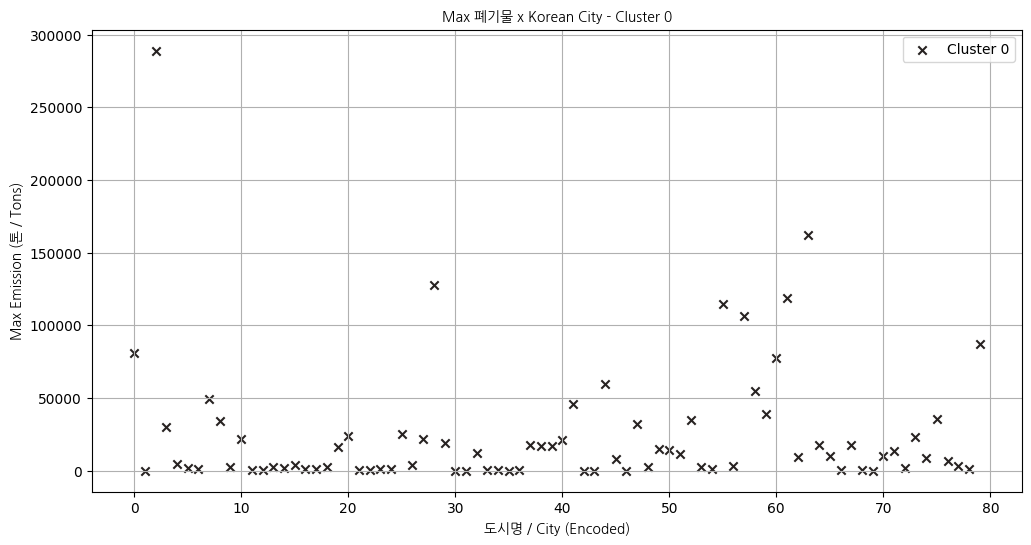

In [126]:
cities_cluster_0 = [
    0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 
    20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 
    39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 
    58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 
    77.0, 78.0, 79.0
]

max_waste_cluster0 = [
    80762.33, 96.00, 289029.35, 30099.29, 4413.33, 1851.05, 1074.52, 49523.87, 34119.40, 2502.53, 21703.48, 190.24, 
    585.25, 2457.54, 1539.85, 3772.15, 1039.57, 1213.92, 2664.15, 15996.93, 23740.50, 237.89, 326.51, 847.11, 1167.92, 
    25525.03, 3760.64, 21598.15, 128050.00, 19141.52, 1.69, 36.35, 12048.73, 227.81, 244.97, 117.58, 157.44, 17829.73, 
    17159.84, 17333.16, 20940.32, 45893.93, 24.54, 3.31, 60016.91, 8212.40, 66.24, 32436.92, 2605.97, 14628.85, 
    14480.98, 11343.96, 34800.00, 2314.42, 1495.37, 114894.32, 3180.19, 106322.70, 54891.85, 38821.92, 77329.73, 
    119200.00, 9642.91, 161956.13, 17653.00, 10326.00, 373.95, 17447.86, 360.44, 154.11, 10273.72, 13676.95, 1571.46, 
    23272.66, 8485.86, 35258.38, 6858.01, 3001.22, 982.48, 87492.27
]

plt.figure(figsize=(12,6))
plt.scatter(cities_cluster_0, max_waste_cluster0, color='#272221', label='Cluster 0', marker='x')

plt.xlabel("도시명 / City (Encoded)", fontproperties=font)
plt.ylabel("Max Emission (톤 / Tons)", fontproperties=font)
plt.title("Max 폐기물 x Korean City - Cluster 0", fontproperties=font)
plt.legend()
plt.grid(True)
plt.show()

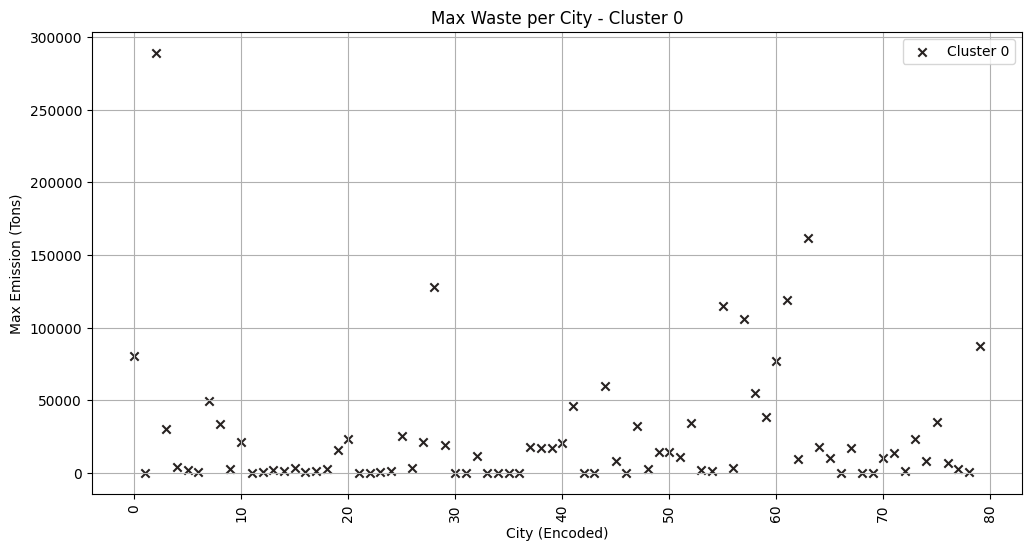

In [95]:
# Extract max emission per city within Cluster 0
cluster_0_data = df_clusterC[df_clusterC["Cluster"] == 0]

# Ensure only unique cities with their max values are taken
max_values_cluster_0 = (
    cluster_0_data.groupby("기초시군구(관할관청)")["연간배출량(톤)"]
    .max()
    .reset_index()
)

# Extract values
cities_cluster_0 = max_values_cluster_0["기초시군구(관할관청)"]
max_waste_cluster_0 = max_values_cluster_0["연간배출량(톤)"]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(cities_cluster_0, max_waste_cluster_0, color='#272221', label='Cluster 0', marker='x')

plt.xlabel("City (Encoded)")
plt.ylabel("Max Emission (Tons)")
plt.title("Max Waste per City - Cluster 0")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate for better readability
plt.show()


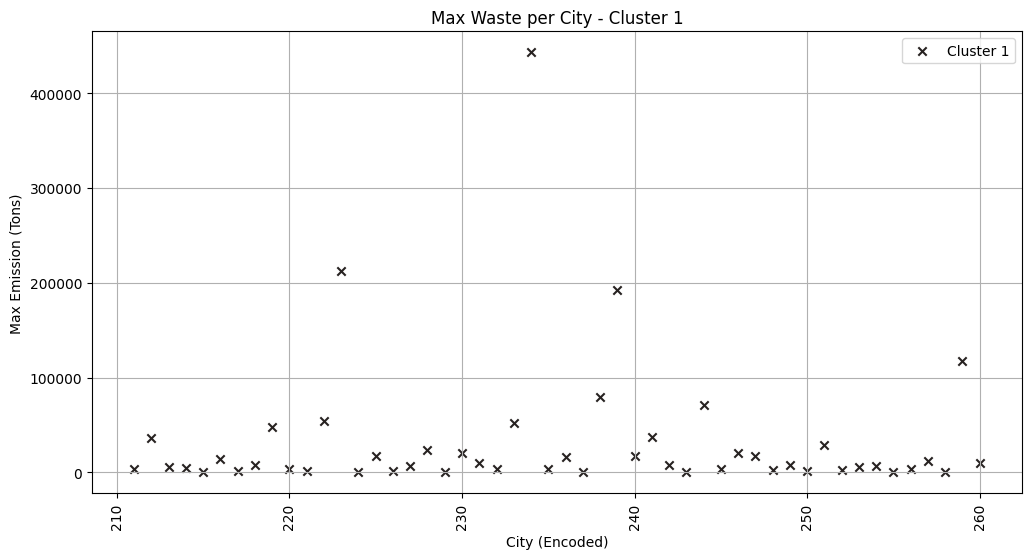

In [100]:
# Extract max emission per city within Cluster 0
cluster_1_data = df_clusterC[df_clusterC["Cluster"] == 1]

# Ensure only unique cities with their max values are taken
max_values_cluster_1 = (
    cluster_1_data.groupby("기초시군구(관할관청)")["연간배출량(톤)"]
    .max()
    .reset_index()
)

# Extract values
cities_cluster_1 = max_values_cluster_1["기초시군구(관할관청)"]
max_waste_cluster_1 = max_values_cluster_1["연간배출량(톤)"]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(cities_cluster_1, max_waste_cluster_1, color='#272221', label='Cluster 1', marker='x')

plt.xlabel("City (Encoded)")
plt.ylabel("Max Emission (Tons)")
plt.title("Max Waste per City - Cluster 1")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate for better readability
plt.show()

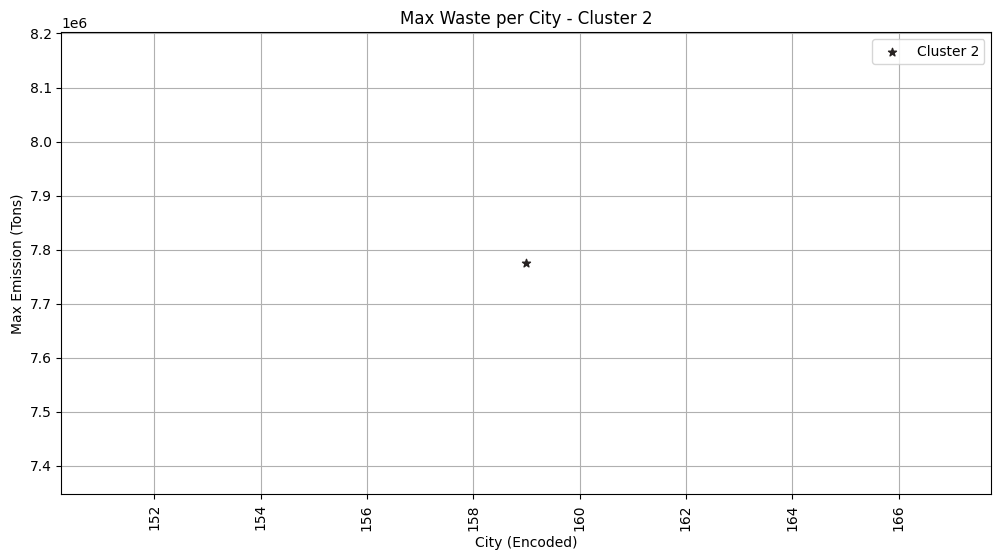

In [104]:
cluster_2_data = df_clusterC[df_clusterC["Cluster"] == 2]

# Ensure only unique cities with their max values are taken
max_values_cluster_1 = (
    cluster_2_data.groupby("기초시군구(관할관청)")["연간배출량(톤)"]
    .max()
    .reset_index()
)

# Extract values
cities_cluster_2 = max_values_cluster_1["기초시군구(관할관청)"]
max_waste_cluster_2 = max_values_cluster_1["연간배출량(톤)"]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(cities_cluster_2, max_waste_cluster_2, color='#272221', label='Cluster 2', marker='*')

plt.xlabel("City (Encoded)")
plt.ylabel("Max Emission (Tons)")
plt.title("Max Waste per City - Cluster 2")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate for better readability
plt.show()

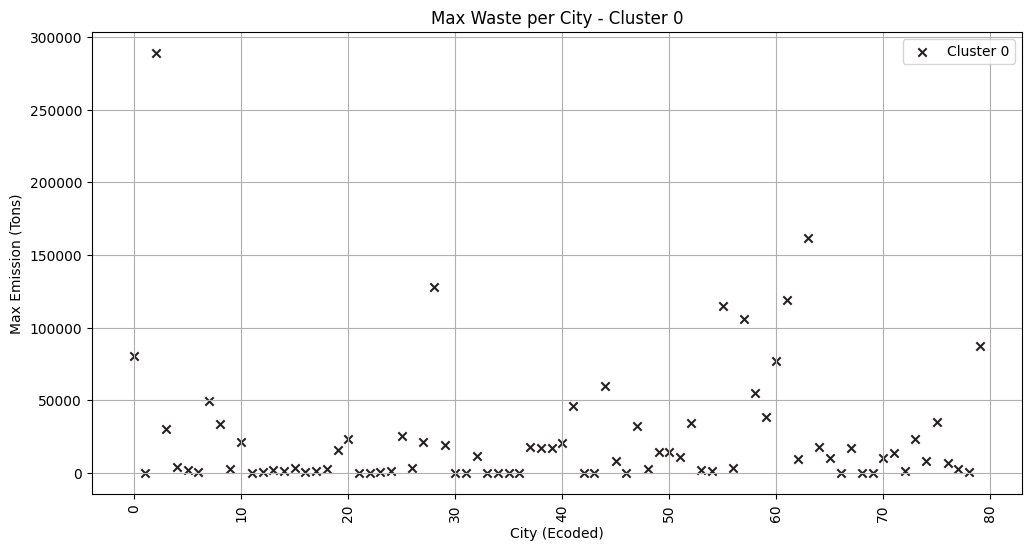

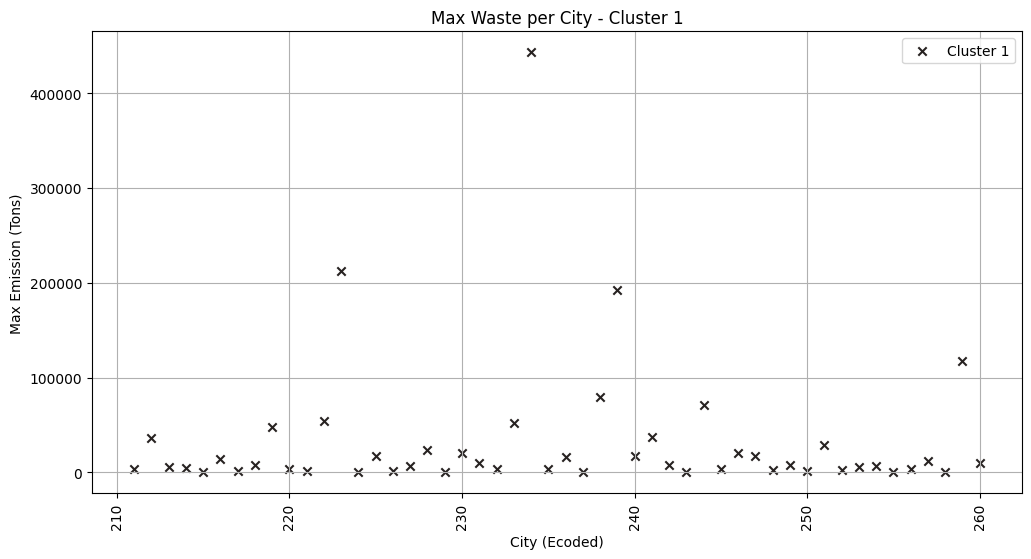

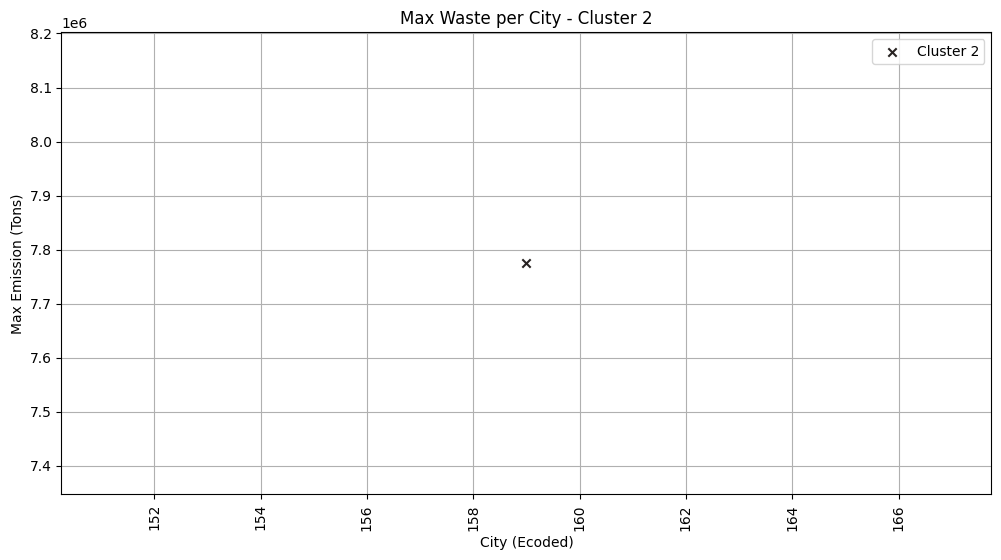

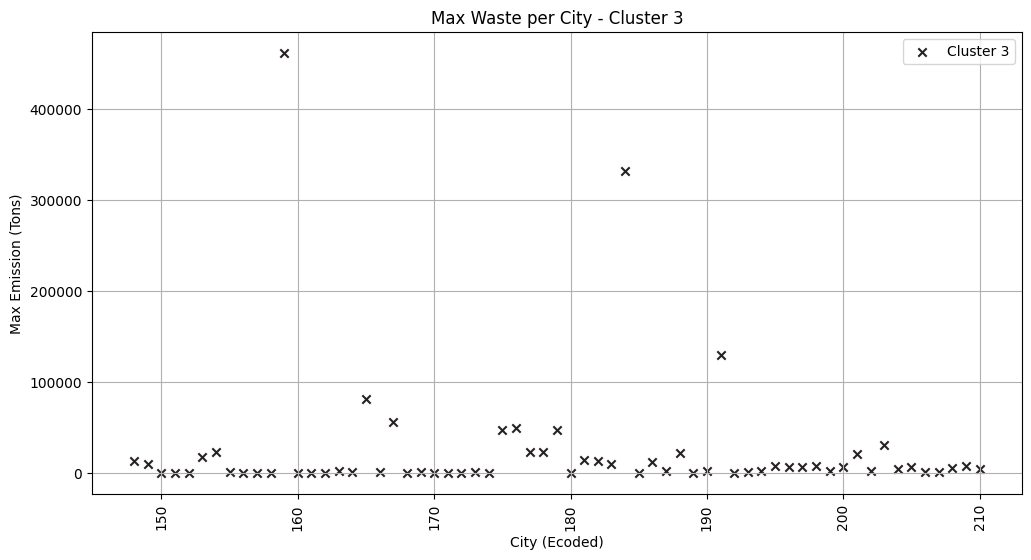

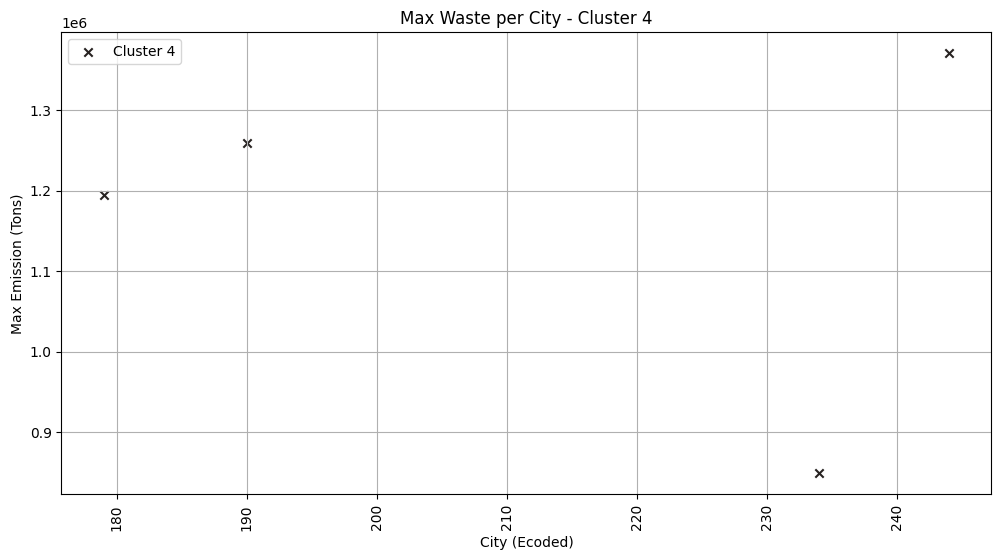

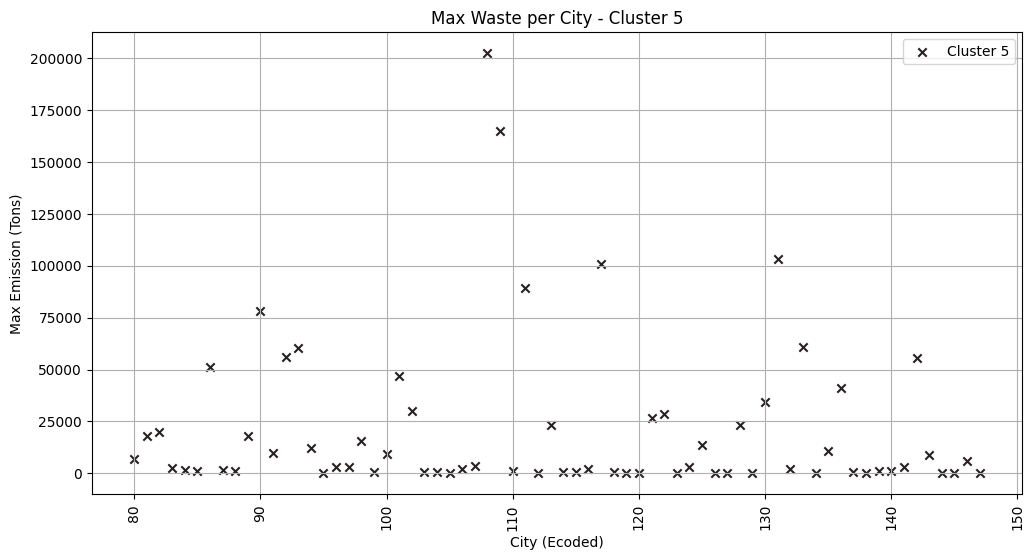

In [127]:
for cluster_num in range(0,6):
    cluster_data = df_clusterC[df_clusterC["Cluster"] == cluster_num]

    max_values_cluster = (
        cluster_data.groupby("기초시군구(관할관청)")["연간배출량(톤)"]
        .max()
        .reset_index()
    )

    #Extract values
    cities_cluster = max_values_cluster["기초시군구(관할관청)"]
    max_waste_cluster = max_values_cluster["연간배출량(톤)"]

    plt.figure(figsize=(12,6))
    plt.scatter(cities_cluster, max_waste_cluster, label=f'Cluster {cluster_num}', color='#272221', marker='x')

    plt.xlabel("City (Ecoded)")
    plt.ylabel("Max Emission (Tons)")
    plt.title(f"Max Waste per City - Cluster {cluster_num}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show()


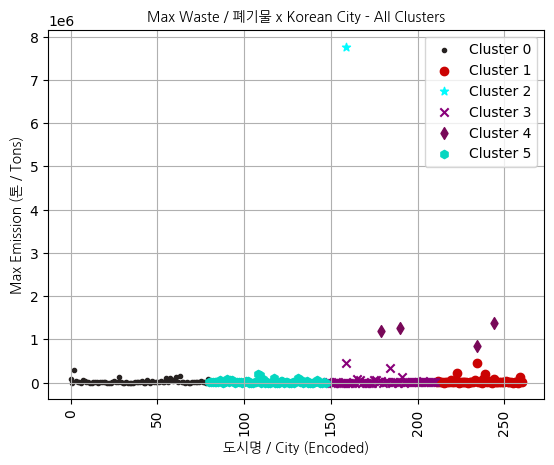

In [131]:
markers = ['.', 'o', '*', 'x', 'd', 'h']
colours = ['#272221', '#cb0303', '#00fbff', '#880079', '#780858', '#05d6c0']

for cluster_num in range(0,6):
    cluster_data = df_clusterC[df_clusterC["Cluster"] == cluster_num]

    max_values_cluster = (
        cluster_data.groupby("기초시군구(관할관청)")["연간배출량(톤)"]
        .max()
        .reset_index()
    )

    cities_cluster = max_values_cluster["기초시군구(관할관청)"]
    max_waste_cluster = max_values_cluster["연간배출량(톤)"]

    plt.scatter(cities_cluster, max_waste_cluster,
                label=f'Cluster {cluster_num}',
                marker=markers[cluster_num],
                color=colours[cluster_num])
    
plt.xlabel("도시명 / City (Encoded)", fontproperties=font)
plt.ylabel("Max Emission (톤 / Tons)", fontproperties=font)
plt.title("Max Waste / 폐기물 x Korean City - All Clusters", fontproperties=font)
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

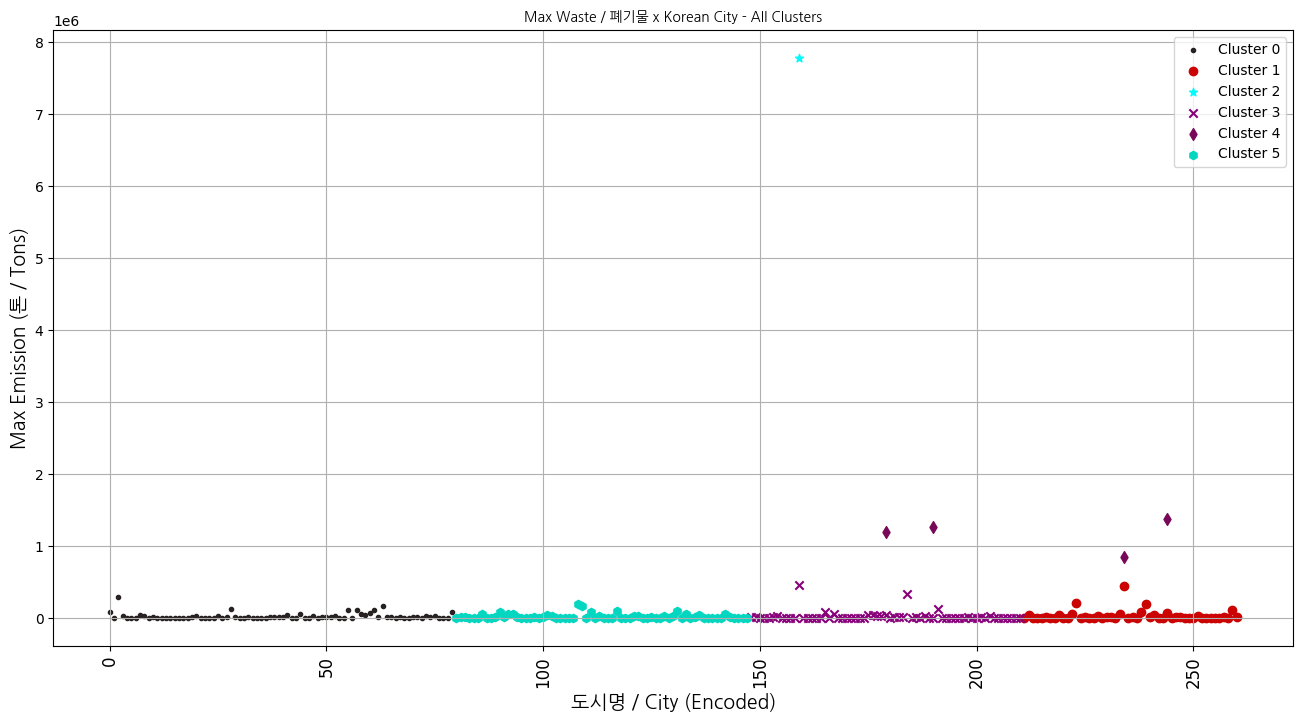

In [138]:
markers = ['.', 'o', '*', 'x', 'd', 'h']
colours = ['#272221', '#cb0303', '#00fbff', '#880079', '#780858', '#05d6c0']

plt.figure(figsize=(16,8))

for cluster_num in range(0,6):
    cluster_data = df_clusterC[df_clusterC["Cluster"] == cluster_num]

    max_values_cluster = (
        cluster_data.groupby("기초시군구(관할관청)")["연간배출량(톤)"]
        .max()
        .reset_index()
    )

    cities_cluster = max_values_cluster["기초시군구(관할관청)"]
    max_waste_cluster = max_values_cluster["연간배출량(톤)"]

    plt.scatter(cities_cluster, max_waste_cluster,
                label=f'Cluster {cluster_num}',
                marker=markers[cluster_num],
                color=colours[cluster_num])
    
plt.xlabel("도시명 / City (Encoded)", fontsize=14, fontproperties=font)
plt.ylabel("Max Emission (톤 / Tons)", fontsize=14, fontproperties=font)
plt.title("Max Waste / 폐기물 x Korean City - All Clusters", fontsize=16, fontproperties=font)

plt.xticks(rotation=90, fontsize=12)
plt.legend()
plt.grid(True)
plt.show()